In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
plt.rc('figure', dpi=200, figsize=(10, 5))

In [61]:
vowels = 'a e i o u y sz z ź ż g r'.split()
data = np.genfromtxt('data.txt', delimiter='\t')
print(data.shape)
X = data[:,:-1]
print(X.shape)
y = data[:,-1].astype(int)
print(y.shape)
labels = [vowels[nr%100]+str(nr//100) for nr in y]  # ['a1', 'e1', 'i1', .., 'r1', 'a2', 'e2', ..]

(48, 64)
(48, 63)
(48,)


[0.65053549 0.1959721 ]


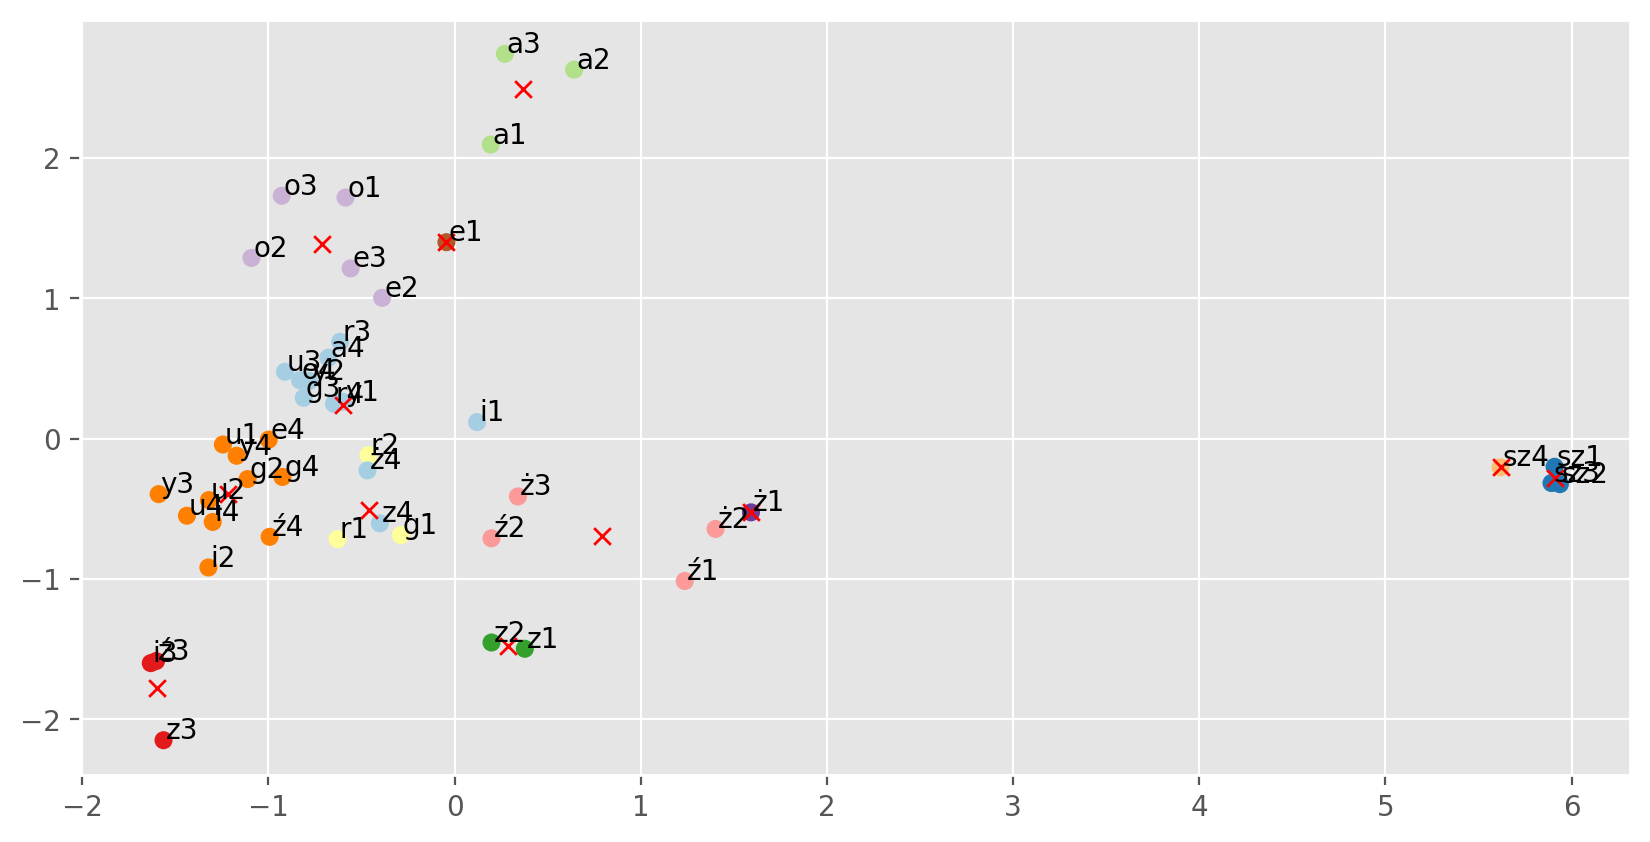

In [62]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

for i, label in enumerate(labels):
    plt.annotate(label, X_pca[i] + 0.01)

k_means = KMeans(init='k-means++', n_clusters=12, n_init=10)
k_means.fit(X)
centroids = pca.transform(k_means.cluster_centers_)

plt.scatter(*X_pca.T, c=k_means.predict(X), cmap='Paired')
plt.scatter(*centroids.T, marker='x', color='red')

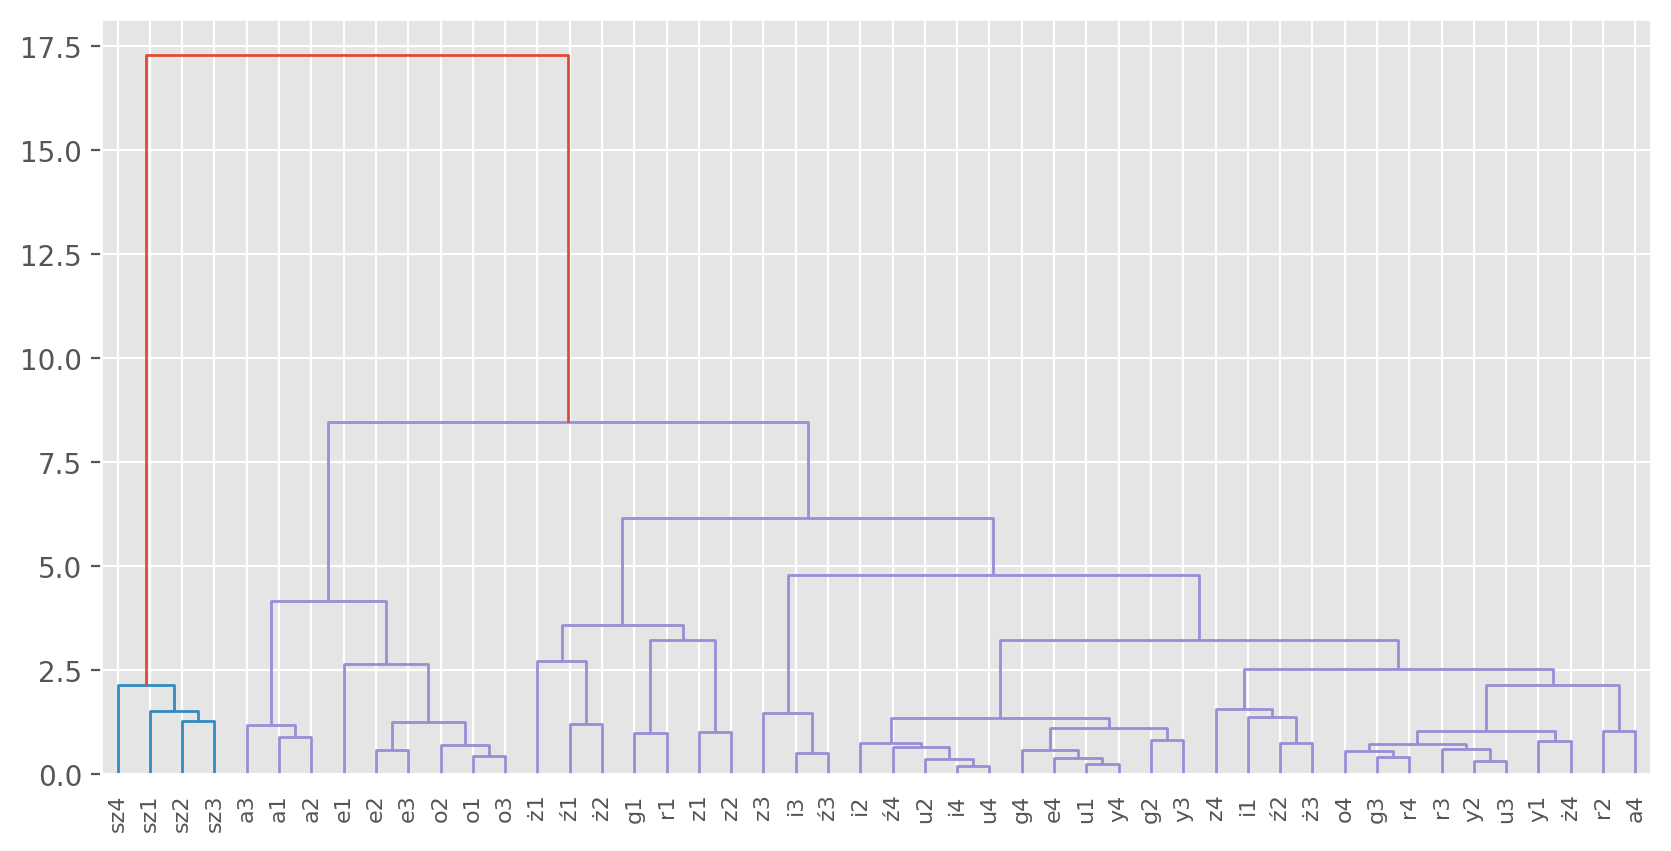

In [63]:
def plot_dendrogram(model, **kwargs):
    from scipy.cluster.hierarchy import dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plot_dendrogram(model, labels=labels)

array([[4.6389e-01, 2.9347e-01, 1.1638e-01, ..., 1.8345e-04, 2.3729e-04,
        1.1337e-04],
       [6.3127e-01, 4.1951e-01, 1.2580e-01, ..., 7.7991e-05, 9.4900e-05,
        7.6796e-05],
       [2.8229e-01, 1.5347e-01, 2.1274e-01, ..., 6.9942e-05, 6.1211e-05,
        4.7354e-05],
       ...,
       [4.7644e-01, 2.9278e-01, 6.6178e-02, ..., 6.2651e-05, 1.7270e-04,
        1.6347e-04],
       [7.4045e-01, 5.6441e-01, 2.2091e-01, ..., 1.0316e-04, 1.0829e-04,
        4.2191e-05],
       [2.8929e-01, 3.8030e-02, 1.3251e-01, ..., 1.9632e-04, 1.4013e-04,
        1.4640e-04]])

[0.57138046 0.126185  ] 0.6975654562656859


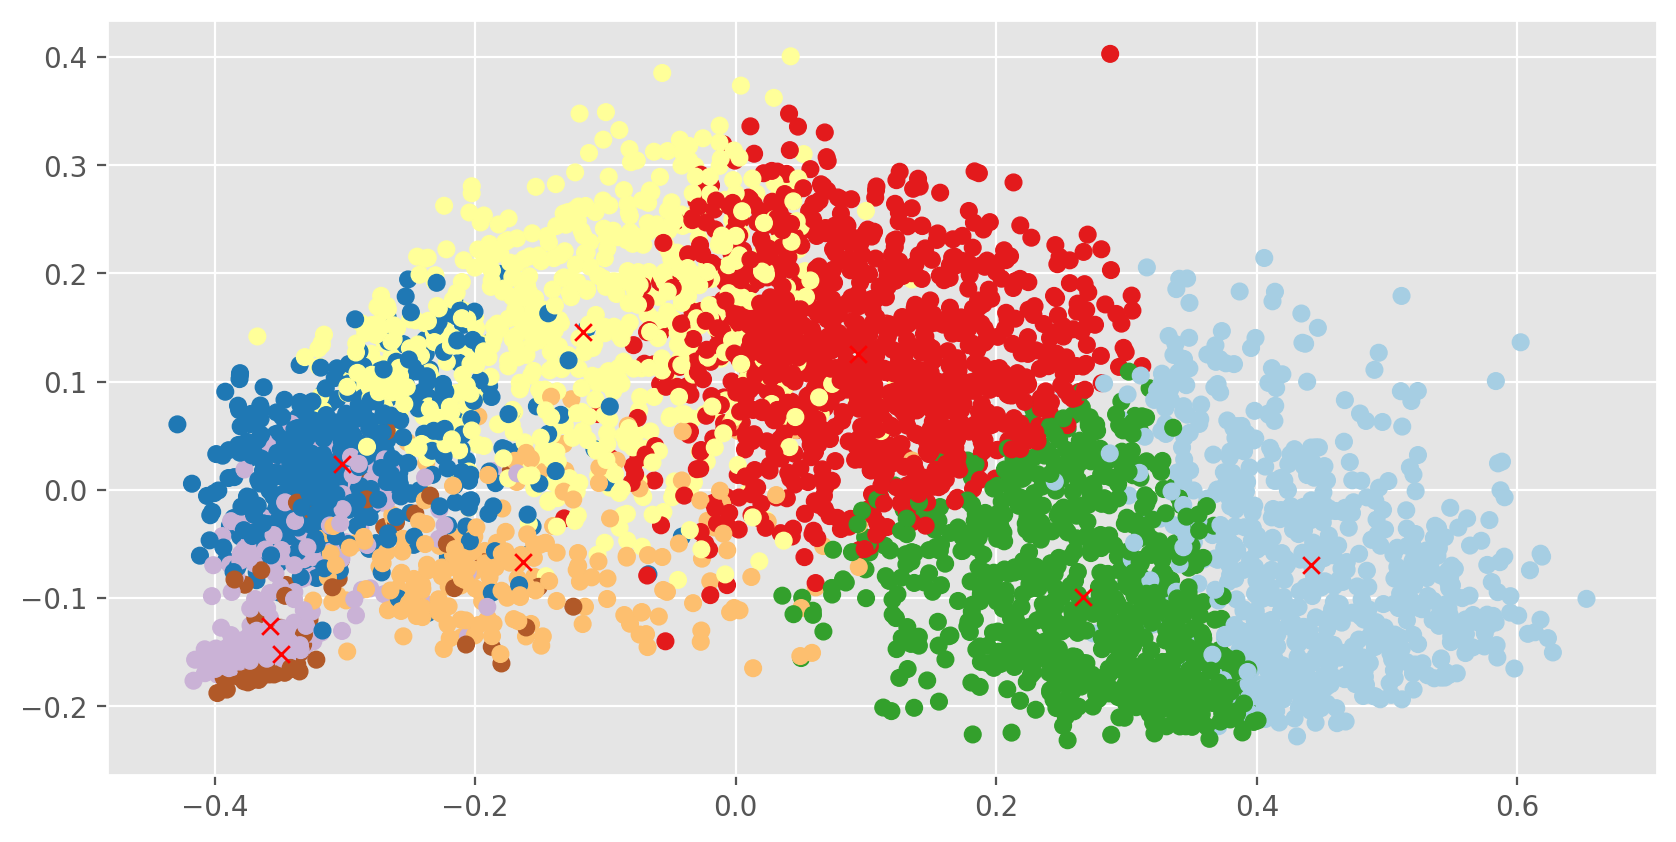

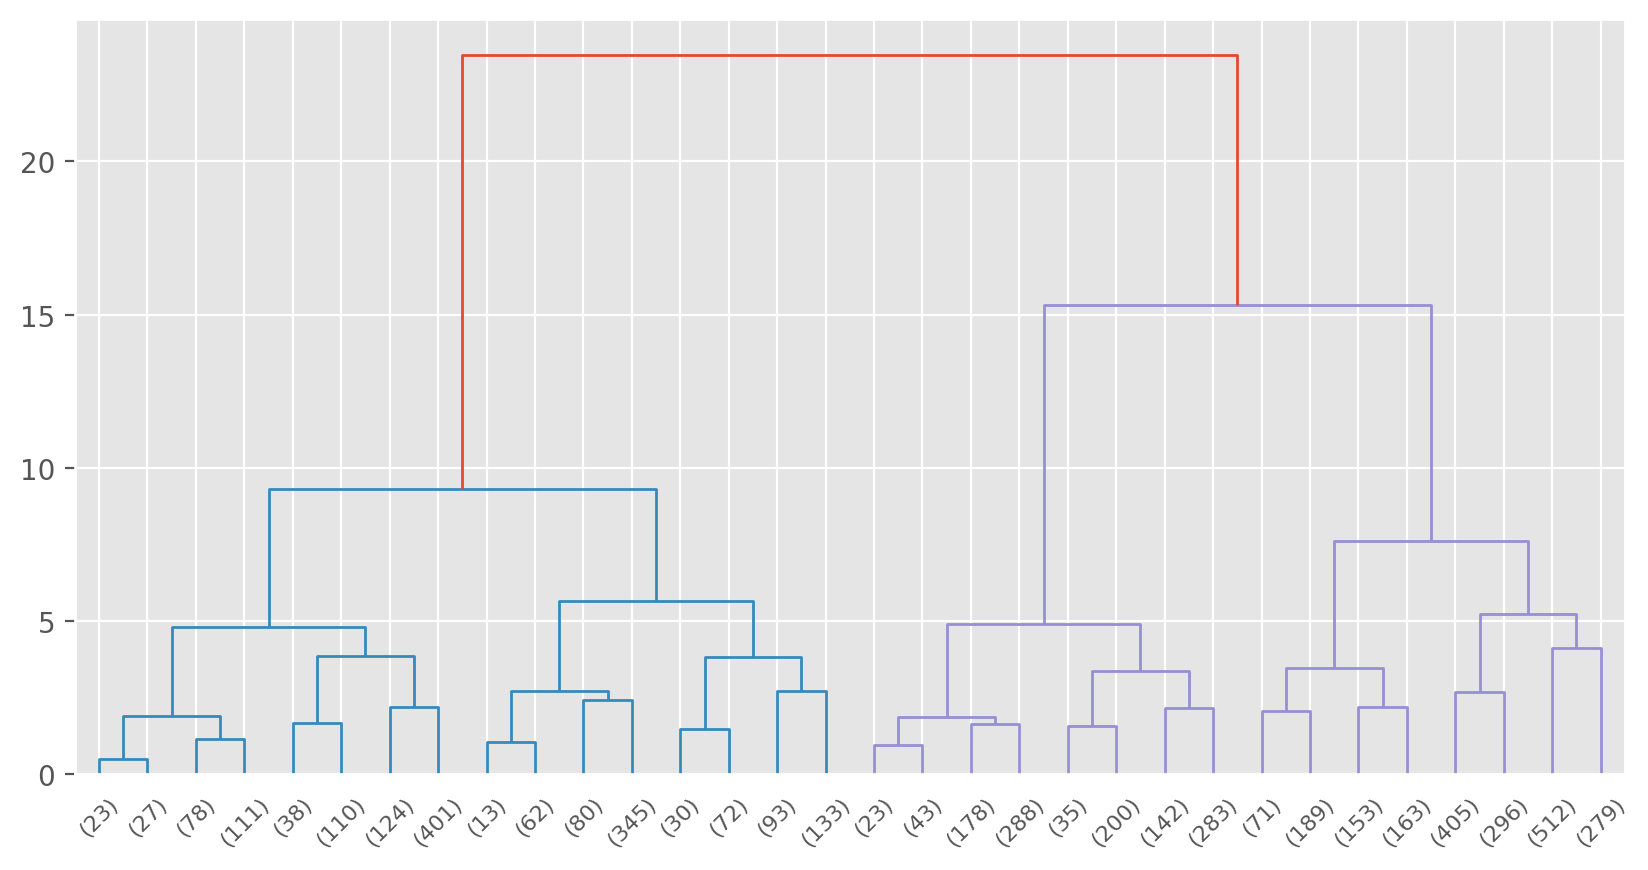

In [204]:
#X = np.genfromtxt('continuous-speech.txt', delimiter='\t')
X = np.genfromtxt('continuous-speech-violin.txt', delimiter='\t')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

kmeans = KMeans()
kmeans.fit(X)
centroids = pca.transform(kmeans.cluster_centers_)
plt.subplots()
plt.scatter(*X_pca.T, c=kmeans.predict(X), cmap='Paired')
#for i, label in enumerate(labels):
#    plt.annotate(label, X_pca[i] + 0.01)
plt.scatter(*centroids.T, marker='x', color='red')

aclust = AgglomerativeClustering()
aclust = model.fit(X)
plt.subplots()
plot_dendrogram(aclust, truncate_mode='level', p=4)

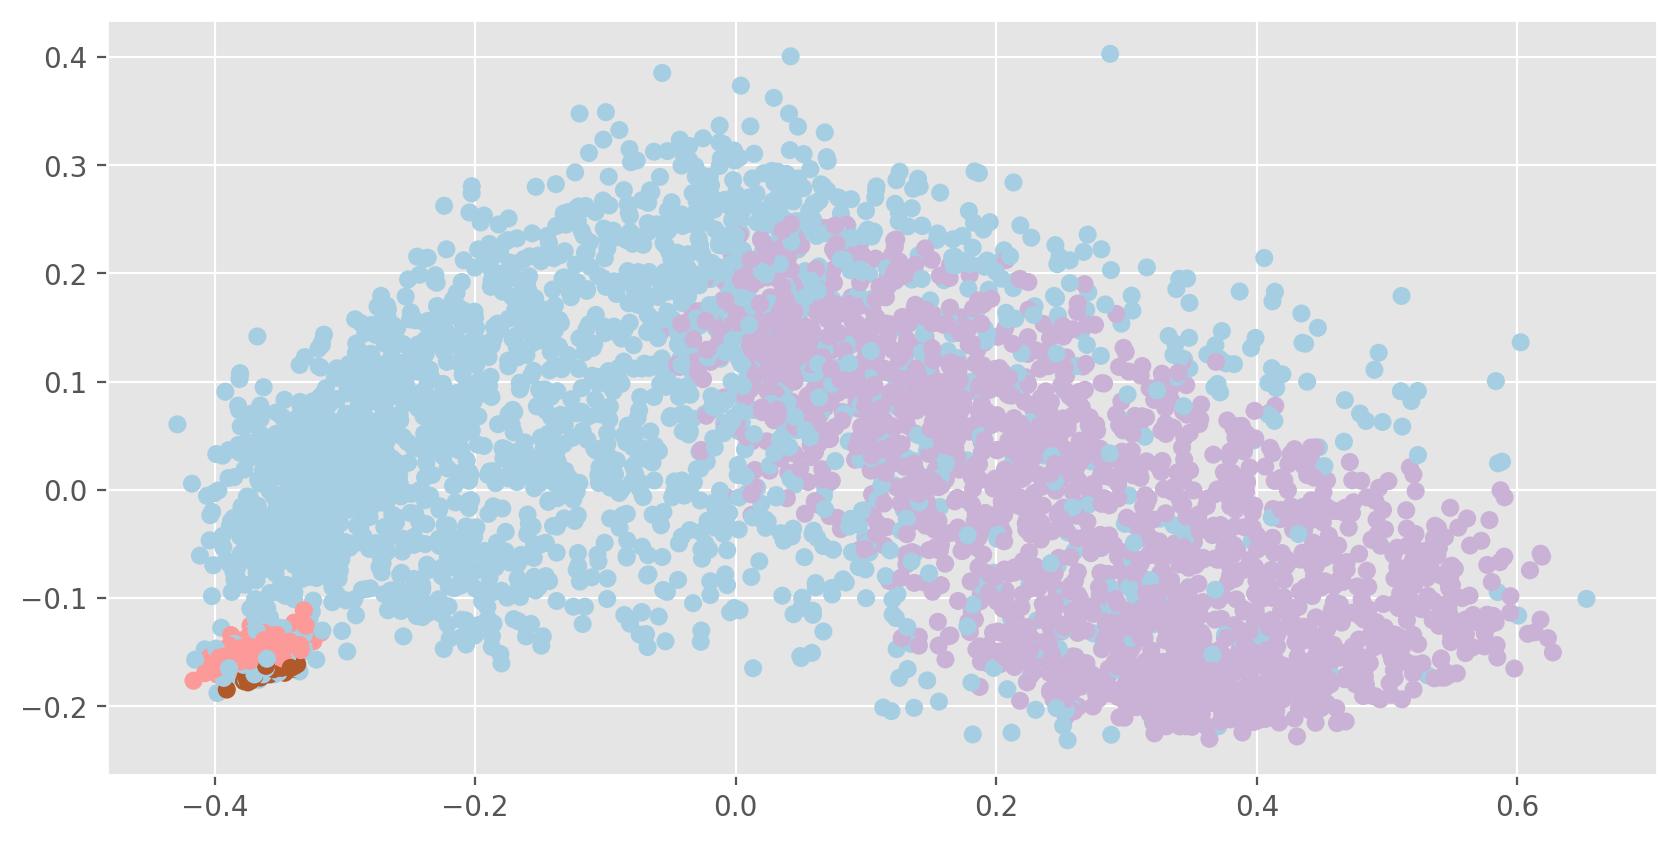

In [203]:
dbscan = DBSCAN(eps=0.1, min_samples=100).fit(X)
plt.subplots()
plt.scatter(*X_pca.T, c=dbscan.labels_, cmap='Paired')

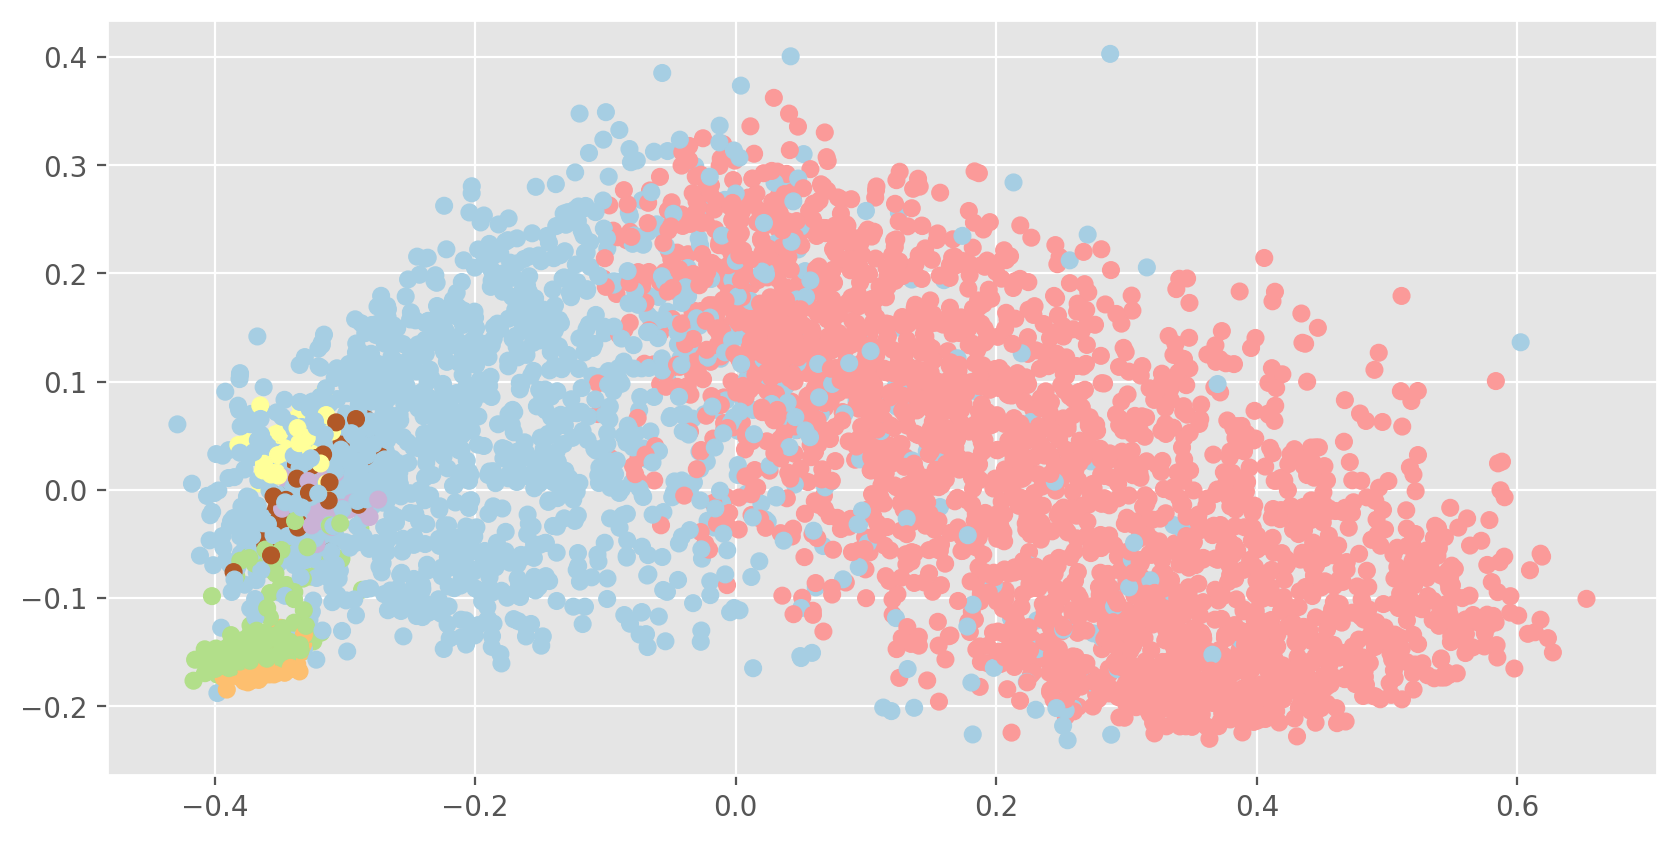

In [200]:
dbscan = DBSCAN(eps=0.13, min_samples=30).fit(X)
plt.subplots()
plt.scatter(*X_pca.T, c=dbscan.labels_, cmap='Paired')